# Coding Etiquette & Reporting

# This Script Contains:
1. Import Libraries & Data
2. Task 2 - Privacy & Security
3. Task 3 - Create Region Category & Crosstab
4. Task 4 - Create exclusion flag for low activity customers
5. Task 5a - Create Profiling Variables - Parent Status
6. Task 5b - Create Profiling Variables - Age Groups
7. Task 5c - Create Profiling Variables - Income
8. Task 5d - Create Profiling Variables - Dependents
9. Task 6a - Create Visualizations - Age Groups
10. Task 6b - Create Visualizations - Parent Status
11. Task 6c - Create Visualizations - Income
12. Task 6d - Create Visualizations - Dependants
13. Task 7a - Aggregation - Age Groups
14. Task 7b - Aggregation - Income
15. Task 7c - Aggregation - Dependents
16. Task 8 - Region/Department Comparisons
17. Export Data Sets

# Import Libraries & Data

In [1]:
# Import Libraries

import pandas as pd
import numpy as np
import seaborn as sns
import scipy as sc
import matplotlib.pyplot as plt
import os

In [2]:
# Setting file path

path = r'C:\Users\cschw\OneDrive\Desktop\Achievement 4\Instacart Basket Analysis'

In [3]:
# Import orders_products_merged

instacart = pd.read_pickle(os.path.join(path, 'Data', 'Prepared Data', 'orders_products_customers_merged.pkl'))

In [4]:
# Check Shape

instacart.shape

(32404859, 34)

In [5]:
# Check head

instacart.head(10)

,order_id,user_id,eval_set,order_number,order_dow,order_hour_of_day,days_since_prior_order,product_id,add_to_cart_order,reordered,...,first_name,surname,gender,state,age,date_joined,n_dependants,marital_status,income,_merge
0,2539329,1,prior,1,2,8,NaN,196,1,0,...,Linda,Nguyen,Female,Alabama,31,2/17/2019,3,married,40423,both
1,2398795,1,prior,2,3,7,15.0,196,1,1,...,Linda,Nguyen,Female,Alabama,31,2/17/2019,3,married,40423,both
2,473747,1,prior,3,3,12,21.0,196,1,1,...,Linda,Nguyen,Female,Alabama,31,2/17/2019,3,married,40423,both
3,2254736,1,prior,4,4,7,29.0,196,1,1,...,Linda,Nguyen,Female,Alabama,31,2/17/2019,3,married,40423,both
4,431534,1,prior,5,4,15,28.0,196,1,1,...,Linda,Nguyen,Female,Alabama,31,2/17/2019,3,married,40423,both
5,3367565,1,prior,6,2,7,19.0,196,1,1,...,Linda,Nguyen,Female,Alabama,31,2/17/2019,3,married,40423,both
6,550135,1,prior,7,1,9,20.0,196,1,1,...,Linda,Nguyen,Female,Alabama,31,2/17/2019,3,married,40423,both
7,3108588,1,prior,8,1,14,14.0,196,2,1,...,Linda,Nguyen,Female,Alabama,31,2/17/2019,3,married,40423,both
8,2295261,1,prior,9,1,16,0.0,196,4,1,...,Linda,Nguyen,Female,Alabama,31,2/17/2019,3,married,40423,both
9,2550362,1,prior,10,4,8,30.0,196,1,1,...,Linda,Nguyen,Female,Alabama,31,2/17/2019,3,married,40423,both


# Task 2 - Privacy  & Security 

In [6]:
# Check column names

instacart.columns

Index(['order_id', 'user_id', 'eval_set', 'order_number', 'order_dow',
       'order_hour_of_day', 'days_since_prior_order', 'product_id',
       'add_to_cart_order', 'reordered', 'product_name', 'aisle_id',
       'department_id', 'prices', 'price_range_loc', 'busiest_day',
       'busiest_days', 'busiest_period_of_day', 'max_order', 'loyalty_flag',
       'mean_product_price', 'spending_flag', 'median_days_between_orders',
       'order_frequency', 'first_name', 'surname', 'gender', 'state', 'age',
       'date_joined', 'n_dependants', 'marital_status', 'income', '_merge'],
      dtype='object')

In [7]:
# Remove the 'First Name' and Surname' columns to comply with security best practices

instacart.drop(['first_name', 'surname'], axis=1, inplace = True)

# Task 3 - Create Region Category for Data & Crosstab

In [8]:
# Create list of Northeast states

Northeast_states = ['Maine', 'New Hampshire', 'Vermont', 'Massachusetts', 'Rhode Island', 'Connecticut', 'New York', 'Pennsylvania', 'New Jersey']

In [9]:
# Create list of Midwest states

Midwest_states = ['Wisconsin', 'Michigan', 'Illinois', 'Indiana', 'Ohio', 'North Dakota', 'South Dakota', 'Nebraska', 'Kansas', 'Minnesota', 'Iowa', 'Missouri']

In [10]:
# Create list of South states

South_states = ['Delaware', 'Maryland', 'District of Columbia', 'Virginia', 'West Virginia', 'North Carolina', 'South Carolina', 'Georgia', 'Florida', 'Kentucky', 'Tennessee', 'Mississippi', 'Alabama', 'Oklahoma', 'Texas', 'Arkansas', 'Louisiana']

In [11]:
# Create list of West states

West_states = ['Idaho', 'Montana', 'Wyoming', 'Nevada', 'Utah', 'Colorado', 'Arizona', 'New Mexico', 'Alaska', 'Washington', 'Oregon', 'California', 'Hawaii']

In [12]:
# Set Region for States

instacart.loc[instacart['state'].isin(Northeast_states), 'Region'] = 'Northeast'

In [13]:
instacart.loc[instacart['state'].isin(Midwest_states), 'Region'] = 'Midwest'

In [14]:
instacart.loc[instacart['state'].isin(South_states), 'Region'] = 'South'

In [15]:
instacart.loc[instacart['state'].isin(West_states), 'Region'] = 'West'

In [16]:
instacart['Region'].value_counts(dropna = False)

Region
South        10791885
West          8292913
Midwest       7597325
Northeast     5722736
Name: count, dtype: int64

In [17]:
# Create a crosstab of the Region and Spending Flag columns to cross check spendin status by region

region_spending_crosstab = pd.crosstab(instacart['Region'], instacart['spending_flag'], dropna = False)

In [18]:
# Dispaly region_spending_crosstab

region_spending_crosstab

spending_flag,High Spender,Low Spender
Region,,
Midwest,155975,7441350
Northeast,108225,5614511
South,209691,10582194
West,160354,8132559


# Task 4 Create an Exclusion Flag for Low Activity Customers

In [19]:
# Create keep category for exclusion_flag

instacart.loc[instacart['max_order'] >= 5, 'exclusion_flag'] = 'Keep'

In [20]:
# Create exclude category exclusion_flag

instacart.loc[instacart['max_order'] < 5, 'exclusion_flag'] = 'Exclude'

In [21]:
# Check head for new column

instacart.head()

,order_id,user_id,eval_set,order_number,order_dow,order_hour_of_day,days_since_prior_order,product_id,add_to_cart_order,reordered,...,gender,state,age,date_joined,n_dependants,marital_status,income,_merge,Region,exclusion_flag
0,2539329,1,prior,1,2,8,NaN,196,1,0,...,Female,Alabama,31,2/17/2019,3,married,40423,both,South,Keep
1,2398795,1,prior,2,3,7,15.0,196,1,1,...,Female,Alabama,31,2/17/2019,3,married,40423,both,South,Keep
2,473747,1,prior,3,3,12,21.0,196,1,1,...,Female,Alabama,31,2/17/2019,3,married,40423,both,South,Keep
3,2254736,1,prior,4,4,7,29.0,196,1,1,...,Female,Alabama,31,2/17/2019,3,married,40423,both,South,Keep
4,431534,1,prior,5,4,15,28.0,196,1,1,...,Female,Alabama,31,2/17/2019,3,married,40423,both,South,Keep


In [22]:
# exclusion_flag value counts

instacart['exclusion_flag'].value_counts(dropna = False)

exclusion_flag
Keep       30964564
Exclude     1440295
Name: count, dtype: int64

In [23]:
# Create subset using only 'Keep' accounts
instacart_kept = instacart[instacart['exclusion_flag'] == 'Keep']

In [24]:
# Check shape of new subset

instacart_kept.shape

(30964564, 34)

# Task 5a - Create Profiling Variables - Parent Status

In [25]:
# Import Department Dataframe to check Department Names

df_dep = pd.read_csv(os.path.join(path, 'Data', 'Original Data', 'departments.csv'), index_col = False)

In [26]:
# Check department names

df_dep.T

,0
department_id,department
1,frozen
2,other
3,bakery
4,produce
5,alcohol
6,international
7,beverages
8,pets
9,dry goods pasta


In [27]:
# Create parent column and set all values to 'No'

instacart_kept['parent'] = 'No'


C:\Users\cschw\AppData\Local\Temp\ipykernel_26148\3668100514.py:3: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  instacart_kept['parent'] = 'No'


In [28]:
# Change parent value to 'Yes' when department_id is 18 (babies)

instacart_kept.loc[instacart_kept['department_id'] == 18, 'parent'] = 'Yes'

In [29]:
# Check head for new column

instacart_kept[['department_id', 'parent']]

,department_id,parent
0,7,No
1,7,No
2,7,No
3,7,No
4,7,No
...,...,...
32404850,7,No
32404851,7,No
32404852,7,No
32404853,7,No


In [30]:
# Create crosstab to verify new parent column

parent_crosstab = pd.crosstab(instacart_kept['department_id'], instacart_kept['parent'], dropna = False)

In [31]:
# Display parent crosstab

parent_crosstab

parent,No,Yes
department_id,,
1,2121731,0
2,34411,0
3,1120828,0
4,9079273,0
5,144627,0
6,255991,0
7,2571901,0
8,93060,0
9,822136,0


In [32]:
# Create single_parent column with default value 'No'

instacart_kept['single_parent'] = 'No'

C:\Users\cschw\AppData\Local\Temp\ipykernel_26148\937316488.py:3: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  instacart_kept['single_parent'] = 'No'


In [33]:
# Insert 'Yes' value for single_parent column where babies = 'yes' and marital status = 'single'

instacart_kept.loc[(instacart_kept['parent'] == 'Yes') & (instacart_kept['marital_status'] == 'single'), 'single_parent'] = 'Yes'

In [34]:
# Check value counts of single_parent flag

instacart_kept['single_parent'].value_counts()

single_parent
No     30895587
Yes       68977
Name: count, dtype: int64

In [35]:
instacart_kept.head()

,order_id,user_id,eval_set,order_number,order_dow,order_hour_of_day,days_since_prior_order,product_id,add_to_cart_order,reordered,...,age,date_joined,n_dependants,marital_status,income,_merge,Region,exclusion_flag,parent,single_parent
0,2539329,1,prior,1,2,8,NaN,196,1,0,...,31,2/17/2019,3,married,40423,both,South,Keep,No,No
1,2398795,1,prior,2,3,7,15.0,196,1,1,...,31,2/17/2019,3,married,40423,both,South,Keep,No,No
2,473747,1,prior,3,3,12,21.0,196,1,1,...,31,2/17/2019,3,married,40423,both,South,Keep,No,No
3,2254736,1,prior,4,4,7,29.0,196,1,1,...,31,2/17/2019,3,married,40423,both,South,Keep,No,No
4,431534,1,prior,5,4,15,28.0,196,1,1,...,31,2/17/2019,3,married,40423,both,South,Keep,No,No


# Task 5b - Create Profiling Variables - Age Groups

I created the categories for age groups somewhat arbitrarily based on my own estimations of the categories 'young adult', 'adult' and 'senior' - if this analysis was done for a real company and not educational purposes, I would ask the appropriate person if there are specific designations for age groups to follow. 

In [36]:
# Check min age of dataframe

min_age = instacart_kept['age'].min()

In [37]:
min_age

18

In [38]:
# Check max age of dataframe

max_age = instacart_kept['age'].max()

In [39]:
max_age

81

In [40]:
# Create 'age_group' column and set all ages 29 or less to 'young adult'

instacart_kept.loc[instacart_kept['age'] <= 29, 'age_group'] = 'Young Adult'

C:\Users\cschw\AppData\Local\Temp\ipykernel_26148\1294997729.py:3: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  instacart_kept.loc[instacart_kept['age'] <= 29, 'age_group'] = 'Young Adult'


In [41]:
# Create 'adult' age group for ages 30-65

instacart_kept.loc[(instacart_kept['age'] > 29) & 
                    (instacart_kept['age'] < 65), 'age_group'] = 'Adult'

In [42]:
# Create 'senior' age group for ages 65+

instacart_kept.loc[instacart_kept['age'] >= 65, 'age_group'] = 'Senior'

In [43]:
instacart_kept['age_group'].value_counts()

age_group
Adult          16951417
Senior          8195544
Young Adult     5817603
Name: count, dtype: int64

# Task 5c - Create Profiling Variables - Income

I created the three income brackets based on data from the world economic forum. Incomes will be categorized as 'low', 'mid' and 'high' based on this source:

https://www.weforum.org/agenda/2022/07/household-income-distribution-wealth-inequality-united-states/

In [44]:
# Create income_group column and set income < 52,000 to low

instacart_kept.loc[instacart_kept['income'] < 52000, 'income_group'] = 'Low'


C:\Users\cschw\AppData\Local\Temp\ipykernel_26148\726145688.py:3: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  instacart_kept.loc[instacart_kept['income'] < 52000, 'income_group'] = 'Low'


In [45]:
# Create middle income group

instacart_kept.loc[(instacart_kept['income'] >= 52000) & 
                    (instacart_kept['income'] <= 156000), 'income_group'] = 'Middle'

In [46]:
# Create high income group

instacart_kept.loc[instacart_kept['income'] > 156000, 'income_group'] = 'High'

In [47]:
# Check value counts for income_group

instacart_kept['income_group'].value_counts(dropna = False)

income_group
Middle    24490126
Low        3632792
High       2841646
Name: count, dtype: int64

# Task 5d - Create Profiling Variables - Dependents

In [48]:
instacart_kept.loc[instacart_kept['n_dependants'] == 0, 'dependants_flag'] = 'No Dependants'

C:\Users\cschw\AppData\Local\Temp\ipykernel_26148\2856942582.py:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  instacart_kept.loc[instacart_kept['n_dependants'] == 0, 'dependants_flag'] = 'No Dependants'


In [49]:
instacart_kept.loc[instacart_kept['n_dependants'] > 0, 'dependants_flag'] = 'Has Dependants'

In [50]:
instacart_kept['dependants_flag'].value_counts(dropna = False)

dependants_flag
Has Dependants    23224883
No Dependants      7739681
Name: count, dtype: int64

# Task 6a - Create Visualizations - Age Groups


In [51]:
# Create subset with only relevant columns and unique user_id

instacart_sample = instacart_kept [['user_id', 'age_group', 'income_group', 'dependants_flag', 'single_parent', 'loyalty_flag', 'spending_flag', 'order_frequency', 'Region']]

In [52]:
# Check head of subset

instacart_sample.head()

,user_id,age_group,income_group,dependants_flag,single_parent,loyalty_flag,spending_flag,order_frequency,Region
0,1,Adult,Low,Has Dependants,No,New customer,Low Spender,Non-frequent customer,South
1,1,Adult,Low,Has Dependants,No,New customer,Low Spender,Non-frequent customer,South
2,1,Adult,Low,Has Dependants,No,New customer,Low Spender,Non-frequent customer,South
3,1,Adult,Low,Has Dependants,No,New customer,Low Spender,Non-frequent customer,South
4,1,Adult,Low,Has Dependants,No,New customer,Low Spender,Non-frequent customer,South


In [53]:
# Drop duplicates in sample to obtain unique user profiles

instacart_sample = instacart_sample.drop_duplicates()

In [54]:
# Check shape

instacart_sample.shape

(167586, 9)

In [55]:
instacart_sample

,user_id,age_group,income_group,dependants_flag,single_parent,loyalty_flag,spending_flag,order_frequency,Region
0,1,Adult,Low,Has Dependants,No,New customer,Low Spender,Non-frequent customer,South
59,15,Senior,Middle,No Dependants,No,Regular customer,Low Spender,Frequent customer,Midwest
131,19,Adult,Middle,Has Dependants,No,New customer,Low Spender,Frequent customer,South
335,21,Senior,Middle,No Dependants,No,Regular customer,Low Spender,Frequent customer,West
540,31,Adult,Middle,Has Dependants,No,Regular customer,Low Spender,Frequent customer,South
...,...,...,...,...,...,...,...,...,...
32404782,178074,Adult,Low,No Dependants,No,Regular customer,Low Spender,Frequent customer,South
32404798,11534,Senior,Middle,No Dependants,No,Regular customer,High Spender,Frequent customer,South
32404810,105857,Young Adult,Low,Has Dependants,No,New customer,High Spender,Frequent customer,West
32404819,120516,Young Adult,Middle,No Dependants,No,New customer,High Spender,Regular customer,West


In [56]:
# Check value counts of age_group -- I used ChatGPT to guide me in creating this pie chart

age_group_counts = instacart_sample['age_group'].value_counts()

In [57]:
# Create labels for pie chart

labels = age_group_counts.index

In [58]:
# Create sizes for pie chart

sizes = age_group_counts.values

In [59]:
colors = ['teal', 'lightblue', 'lightgrey']

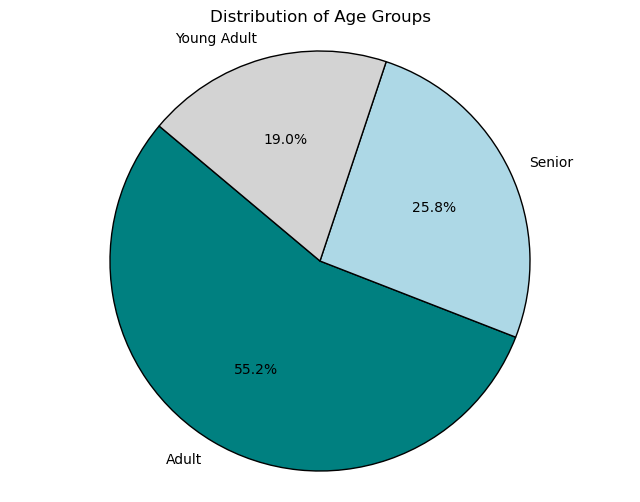

In [60]:
# Create pie chart with help from ChatGPT

age_group_pie = plt.figure(figsize=(8, 6))
plt.pie(sizes, labels=labels, autopct='%1.1f%%', startangle=140, colors=colors, wedgeprops={'edgecolor': 'black'})
plt.title('Distribution of Age Groups')
plt.axis('equal')

plt.savefig(os.path.join(path, 'Analysis','Visualizations','age_pie.png'))
plt.show()

 - This chart shows that adults age 30-64 make up the majority of orders. Seniors are the second largest group and young adults place the least number of orders. 

# Task 6b - Create Visualizations - Parent Status


In [61]:
# Create subset 'parent' column is only yes

parent_df = instacart_kept[(instacart_kept['parent'] == 'Yes')]

In [62]:
# Create count of 'yes' value in parent column

parent_count = parent_df['parent'].value_counts().get('Yes', 0)

In [63]:
# Create count of 'yes' value in single_parent column

single_parent_count = parent_df['single_parent'].value_counts().get('Yes', 0)

In [64]:
# Set counts for bar graph

counts = pd.DataFrame({
    'category': ['parent', 'single_parent'],
    'count': [parent_count, single_parent_count]
})

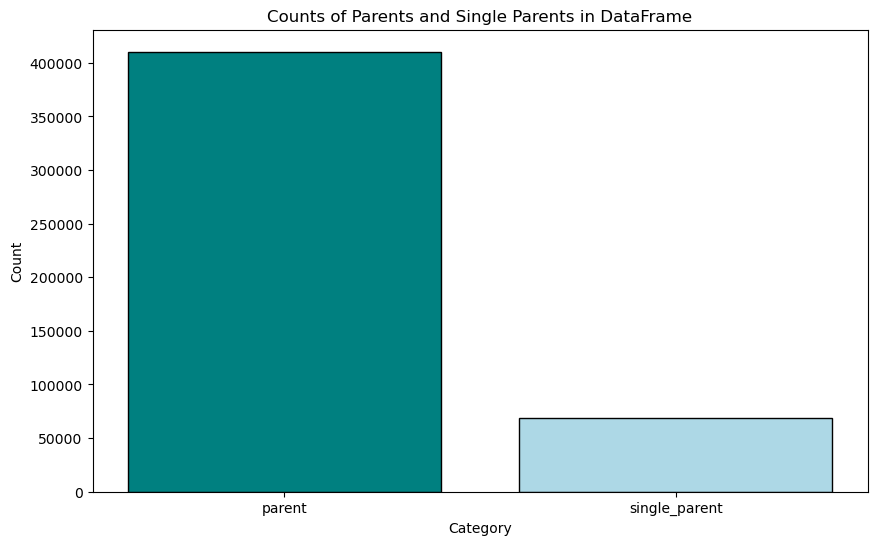

In [65]:
# Create bar graph of 'yes' in parents and single parents column

parent_bar = plt.figure(figsize=(10, 6))
bars = plt.bar(counts['category'], counts['count'], color=['teal', 'lightblue'], edgecolor='black')
plt.xlabel('Category')
plt.ylabel('Count')
plt.title('Counts of Parents and Single Parents in DataFrame')

plt.savefig(os.path.join(path, 'Analysis','Visualizations','parent_single_parent_bar.png'))

- This chart shows the quantity of users in the data frame categorized as 'parent' or more specifically as 'single_parent'. This chart shows that single parents make up a small portion of the dataframe

In [66]:
# Check value counts of parent column for pie chart

parent_count_pie = instacart_kept['parent'].value_counts()

In [67]:
pie_colors = ['teal', 'lightblue']

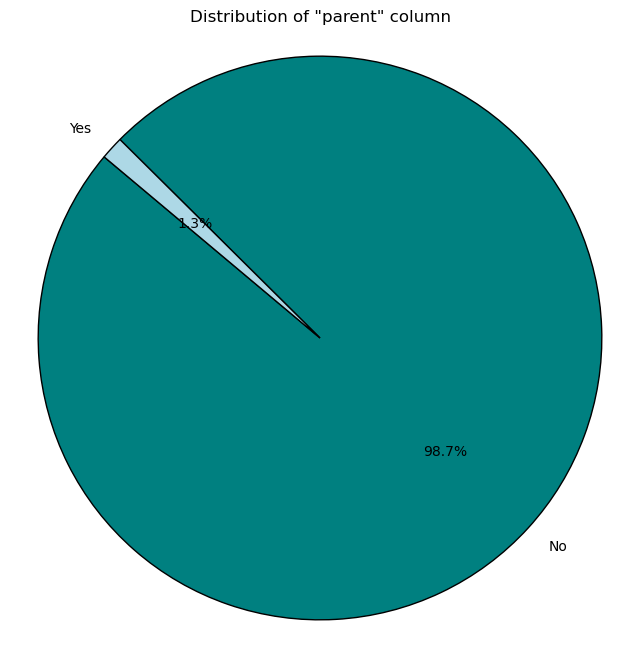

In [68]:
parent_pie = plt.figure(figsize=(8, 8))
plt.pie(parent_count_pie, labels=parent_count_pie.index, autopct='%1.1f%%', startangle=140, colors=pie_colors, wedgeprops={'edgecolor': 'black'})
plt.title('Distribution of "parent" column')
plt.axis('equal') 

plt.savefig(os.path.join(path, 'Analysis','Visualizations','parent_single_parent_piepng'))
            
plt.show()

- This chart is less useful than I thought it would be. Part of the problem is that I am categorizing parents based on who has purchased items from the babies department. However, just because someone purchases from the baby department doesn't necessarily mean they're a parent, and vice versa. So this chart is less useful then expected. However, it does show that sales from the babies department make up a small portion of transactions.

# Task 6c - Create Visualizations - Income

- Used ChatGPT to help with this code

In [69]:
income_counts = instacart_kept['income_group'].value_counts()

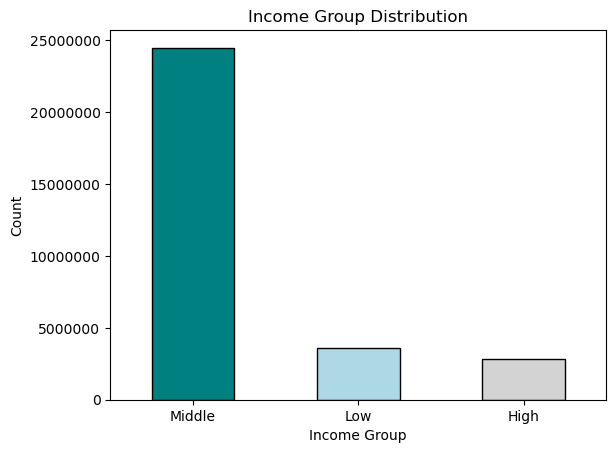

In [128]:
income_group_bar = income_counts.plot(kind='bar', color=['teal', 'lightblue', 'lightgrey'], edgecolor='black')
plt.title('Income Group Distribution')
plt.xlabel('Income Group')
plt.ylabel('Count')

# Set x-axis labels to be horizontal
plt.xticks(rotation=0)

# Remove scientific notation on the y-axis
plt.ticklabel_format(style='plain', axis='y')

# Save the plot
plt.savefig(os.path.join(path, 'Analysis', 'Visualizations', 'income_group_bar.png'))

# Show the plot
plt.show()

- The vast majority of instacart users fall into the middle class income bracket.

# Task 6d - Create Visualizations - Dependants

In [71]:
# Create value counts of dependant_flag column

dependants_flag_counts = instacart_kept['dependants_flag'].value_counts()

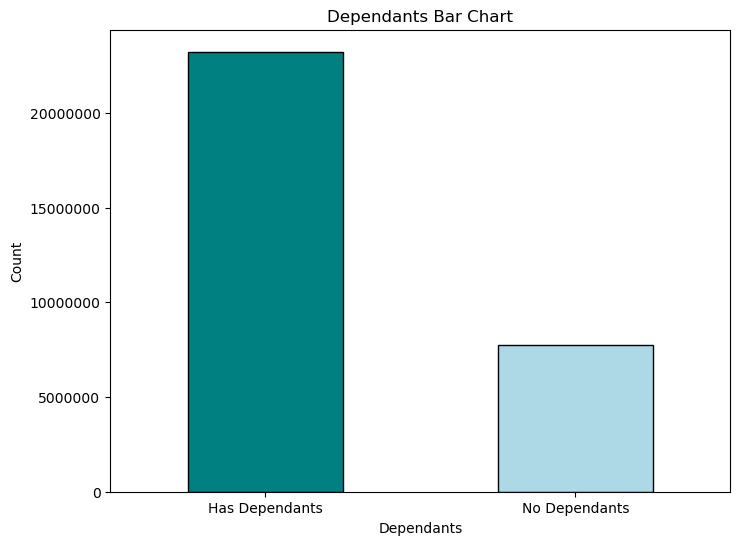

In [131]:
# Generate bar graph of dependants_flag column


# Create bar plot
dependants_bar = plt.figure(figsize=(8, 6))
ax = dependants_flag_counts.plot(kind='bar', color=['teal', 'lightblue'], edgecolor='black')

# Customize plot
ax.set_title('Dependants Bar Chart')
ax.set_xlabel('Dependants')
ax.set_ylabel('Count')

# Set x-axis labels to horizontal
ax.set_xticklabels(ax.get_xticklabels(), rotation=0)

# Remove scientific notation from y-axis
ax.get_yaxis().get_major_formatter().set_scientific(False)

# Save the figure
plt.savefig(os.path.join(path, 'Analysis', 'Visualizations', 'dependants_bar.png'))

# Show plot
plt.show()

- This chart shows that most instacart users have depedants - this conflicts with the previous chart about parents based on baby purchases. However, not all depedants are babies. So, this chart makes sense and shows that the majority of instacart users have dependants in some form. 


# Task 7a - Aggregation - Age Groups

In [73]:
# Create subset of dataframe with 'prices' column as the total cost of each order:

orders_subset = instacart_kept.groupby(['user_id', 'age_group', 'income_group', 'dependants_flag', 'loyalty_flag', 'Region', 'order_number', 'days_since_prior_order'])['prices'].sum().reset_index()

In [74]:
# Change 'prices' to 'order_total'

orders_subset.rename(columns = {'prices' : 'order_total'}, inplace = True)

In [75]:
# Check head of subset

orders_subset.head()

,user_id,age_group,income_group,dependants_flag,loyalty_flag,Region,order_number,days_since_prior_order,order_total
0,1,Adult,Low,Has Dependants,New customer,South,2,15.0,35.4
1,1,Adult,Low,Has Dependants,New customer,South,3,21.0,28.2
2,1,Adult,Low,Has Dependants,New customer,South,4,29.0,26.0
3,1,Adult,Low,Has Dependants,New customer,South,5,28.0,57.0
4,1,Adult,Low,Has Dependants,New customer,South,6,19.0,25.0


In [136]:
# Aggregate age category

age_category_aggregation = orders_subset.groupby('age_group').agg({'days_since_prior_order' : ['min', 'mean', 'max'], 
                                                                  'order_total' : ['min', 'mean', 'max']})

In [137]:
# Check results

age_category_aggregation

days_since_prior_order                  order_total             \
                               min       mean   max         min       mean   
age_group                                                                    
Adult                          0.0  10.387016  30.0         0.0  78.679841   
Senior                         0.0  10.372165  30.0         0.0  78.366813   
Young Adult                    0.0  10.401140  30.0         0.0  79.055096   

                     
                max  
age_group            
Adult        1092.2  
Senior        751.1  
Young Adult   842.1

- The mean days since prior order is approximately the same for each group. This would suggest relatively consistent ordering patterns amongst age groups. While the mean for order total is also roughly the same across groups, the max value is higher for adults and young adults, suggesting that some adults between the ages of 30 and 64 may spend more or make larger orders.

# Task 7b - Aggregation - Income Groups

In [78]:
# Aggregate income group column

income_category_aggregation = orders_subset.groupby('income_group').agg({'days_since_prior_order' : ['min', 'mean', 'max'],
                                                                        'order_total' : ['min', 'mean', 'max']})

In [79]:
# Check results

income_category_aggregation

days_since_prior_order                  order_total             \
                                min       mean   max         min       mean   
income_group                                                                  
High                            0.0  10.116443  30.0         0.0  84.359338   
Low                             0.0  11.049171  30.0         1.0  53.565990   
Middle                          0.0  10.287313  30.0         0.0  82.902383   

                      
                 max  
income_group          
High          1047.4  
Low            875.0  
Middle        1092.2

- This data shows that people with low incomes -place orders slightly less frquently than people with middle or high incomes based on the mean value for days since prior order. People in the low income group also place orders with a lower mean value then people in the middle and high income groups. People in the high and middle income groups have a similar mean value for order total, suggesting that they spend similarly, while people from the low income group spend much less on their orders. 

# Task 7c - Aggregation - Dependants

In [80]:
# Aggregate dependants_flag column

dependants_flag_aggregation = orders_subset.groupby('dependants_flag').agg({'days_since_prior_order' : ['min', 'mean', 'max'],
                                                                               'order_total' : ['min', 'mean', 'max']})

In [81]:
dependants_flag_aggregation

days_since_prior_order                  order_total  \
                                   min       mean   max         min   
dependants_flag                                                       
Has Dependants                     0.0  10.388225  30.0         0.0   
No Dependants                      0.0  10.378169  30.0         0.0   

                                    
                      mean     max  
dependants_flag                     
Has Dependants   78.728425  1092.2  
No Dependants    78.482107   875.0

- Customer with dependants have a higher max value for order totals, however, the mean values are the same for both groups suggesting similarity in spending patterns. 

# Task 8 -  Compare Customer Profiles with Regions & Departments

# Count of Users in each Income Group by Region

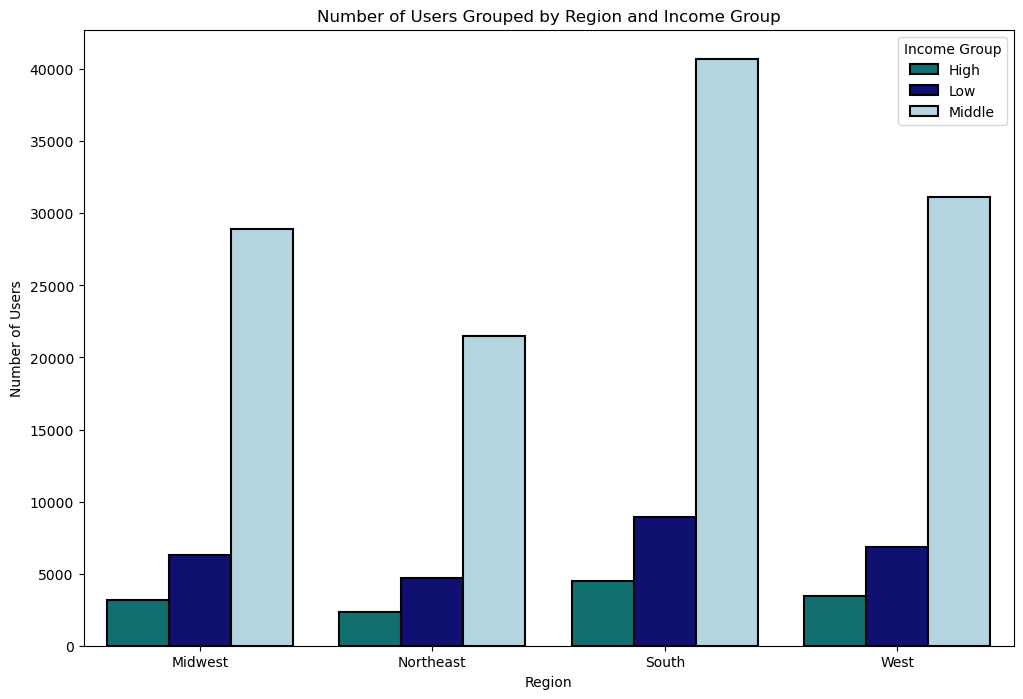

In [82]:
# Generate user counts for bar graph

user_counts = orders_subset.groupby(['Region', 'income_group'])['user_id'].nunique().reset_index()

# Rename the column to reflect the count of unique users
user_counts.rename(columns={'user_id': 'user_count'}, inplace=True)

# Create the bar plot with custom colors and black borders
plt.figure(figsize=(12, 8))
palette = ['teal', 'navy', 'lightblue']
bar_plot = sns.barplot(x='Region', y='user_count', hue='income_group', data=user_counts, palette=palette)

# Add black borders to the bars
for bar in bar_plot.patches:
    bar.set_edgecolor('black')
    bar.set_linewidth(1.5)

# Add titles and labels
plt.title('Number of Users Grouped by Region and Income Group')
plt.xlabel('Region')
plt.ylabel('Number of Users')
plt.legend(title='Income Group')

# Save the plot as an image file
plt.savefig(os.path.join(path, 'Analysis','Visualizations','region_income_bar.png'), bbox_inches='tight')

# Display the plot
plt.show()

- Middle income customers make up the majority of users regardless of region

# Count of Users in each Age Group by Region

In [83]:
# Step 1: Group the data by 'age_group' and 'Region'
grouped_data = orders_subset.groupby(['age_group', 'Region'])


In [84]:
# Step 2: Count the number of user_ids in each age group and region
count_user_ids = grouped_data.size().unstack(fill_value=0)

# Reorder DataFrame so that the rows are sorted by the total number of users, with the highest first
count_user_ids = count_user_ids.loc[count_user_ids.sum(axis=1).sort_values(ascending=False).index]




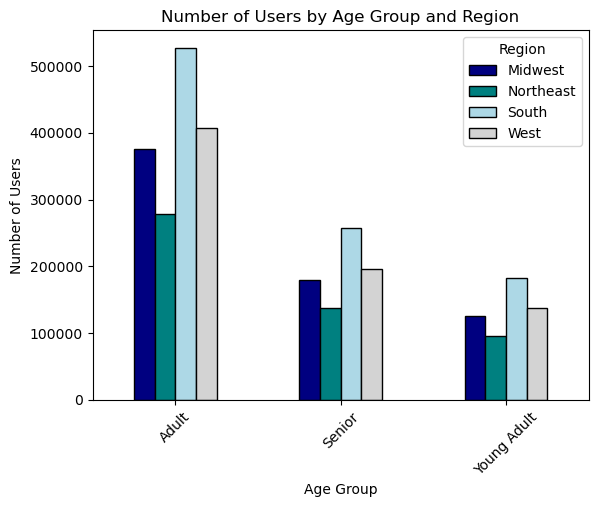

In [85]:
# Step 3: Plot the bar chart with customized colors, arrangement, and black borders
ax = count_user_ids.plot(kind='bar', stacked=False, color=['navy', 'teal', 'lightblue', 'lightgrey'], edgecolor='black')

plt.xlabel('Age Group')
plt.ylabel('Number of Users')
plt.title('Number of Users by Age Group and Region')
plt.xticks(rotation=45)  # Rotate x-axis labels for better readability
plt.legend(title='Region')

# Save the figure before showing it
plt.savefig(os.path.join(path, 'Analysis','Visualizations','age_region_bar.png'), format='png', dpi=300, bbox_inches='tight')

- The majority of users fall into the 'adult' category, regardless of region.

# Count of Users with Dependants by Region

In [86]:
# Group by 'Region' and 'dependants_flag', count 'user_id', and unstack 'dependants_flag'

grouped = orders_subset.groupby(['Region', 'dependants_flag'])['user_id'].count().unstack()


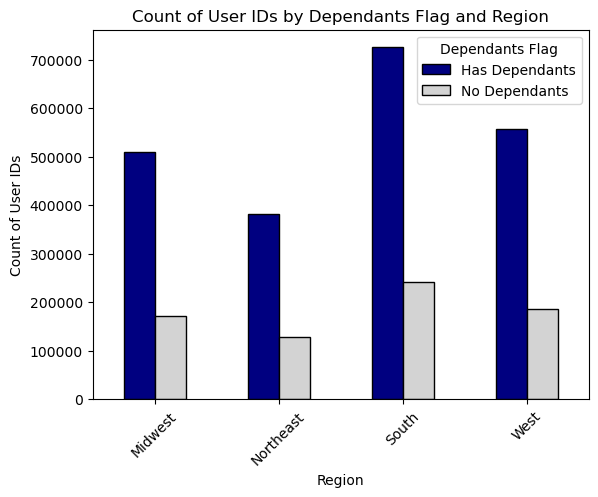

In [87]:
# Plotting the bar graph

ax = grouped.plot(kind='bar', color=['navy', 'lightgrey'], edgecolor='black')
plt.title('Count of User IDs by Dependants Flag and Region')
plt.xlabel('Region')
plt.ylabel('Count of User IDs')
plt.xticks(rotation=45)
plt.legend(title='Dependants Flag')

plt.savefig(os.path.join(path, 'Analysis','Visualizations','dependants_region_bar.png'))

plt.show()

- Most users have at least one dependant

# Merge in Department Name Data

In [88]:
# Check dataframe

df_dep

,department_id,1,2,3,4,5,6,7,8,9,...,12,13,14,15,16,17,18,19,20,21
0,department,frozen,other,bakery,produce,alcohol,international,beverages,pets,dry goods pasta,...,meat seafood,pantry,breakfast,canned goods,dairy eggs,household,babies,snacks,deli,missing


In [89]:
# Tranpose

departments = df_dep.T

In [90]:
# Create index

departments.reset_index(inplace = True)

In [91]:
# Copy row 0 into variable
new_header = departments.iloc[0]

In [92]:
# Remove row 0
departments = departments[1:]

In [93]:
# assign header row

departments.columns = new_header

In [94]:
# check

departments

,department_id,department
1,1,frozen
2,2,other
3,3,bakery
4,4,produce
5,5,alcohol
6,6,international
7,7,beverages
8,8,pets
9,9,dry goods pasta
10,10,bulk


In [95]:
# Check instacart_kept columns

instacart_kept.columns

Index(['order_id', 'user_id', 'eval_set', 'order_number', 'order_dow',
       'order_hour_of_day', 'days_since_prior_order', 'product_id',
       'add_to_cart_order', 'reordered', 'product_name', 'aisle_id',
       'department_id', 'prices', 'price_range_loc', 'busiest_day',
       'busiest_days', 'busiest_period_of_day', 'max_order', 'loyalty_flag',
       'mean_product_price', 'spending_flag', 'median_days_between_orders',
       'order_frequency', 'gender', 'state', 'age', 'date_joined',
       'n_dependants', 'marital_status', 'income', '_merge', 'Region',
       'exclusion_flag', 'parent', 'single_parent', 'age_group',
       'income_group', 'dependants_flag'],
      dtype='object')

In [96]:
# Create list of columns for new subset

subset_list =   ['order_id', 'user_id', 'order_number',  
    'product_name', 'department_id', 'prices', 'loyalty_flag',
     'state', 'marital_status', 'Region',
    'age_group', 'income_group', 'dependants_flag']

In [97]:
# Create subset with only relevant columns to merge with department names list

comparison_subset = instacart_kept[subset_list]

In [98]:
# check head of subset

comparison_subset.head()

,order_id,user_id,order_number,product_name,department_id,prices,loyalty_flag,state,marital_status,Region,age_group,income_group,dependants_flag
0,2539329,1,1,Soda,7,9.0,New customer,Alabama,married,South,Adult,Low,Has Dependants
1,2398795,1,2,Soda,7,9.0,New customer,Alabama,married,South,Adult,Low,Has Dependants
2,473747,1,3,Soda,7,9.0,New customer,Alabama,married,South,Adult,Low,Has Dependants
3,2254736,1,4,Soda,7,9.0,New customer,Alabama,married,South,Adult,Low,Has Dependants
4,431534,1,5,Soda,7,9.0,New customer,Alabama,married,South,Adult,Low,Has Dependants


In [99]:
# Make sure data type is same in both dataframe

departments['department_id'] = departments['department_id'].astype('int8')

In [100]:
# Make sure data type is same

comparison_subset['department_id'] = comparison_subset['department_id'].astype('int8')

C:\Users\cschw\AppData\Local\Temp\ipykernel_26148\3143675569.py:3: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  comparison_subset['department_id'] = comparison_subset['department_id'].astype('int8')


In [101]:
# Merge on department_id

department_comparison_subset = comparison_subset.merge(departments, on = 'department_id', indicator = True)

In [102]:
department_comparison_subset.head()

,order_id,user_id,order_number,product_name,department_id,prices,loyalty_flag,state,marital_status,Region,age_group,income_group,dependants_flag,department,_merge
0,2539329,1,1,Soda,7,9.0,New customer,Alabama,married,South,Adult,Low,Has Dependants,beverages,both
1,2398795,1,2,Soda,7,9.0,New customer,Alabama,married,South,Adult,Low,Has Dependants,beverages,both
2,473747,1,3,Soda,7,9.0,New customer,Alabama,married,South,Adult,Low,Has Dependants,beverages,both
3,2254736,1,4,Soda,7,9.0,New customer,Alabama,married,South,Adult,Low,Has Dependants,beverages,both
4,431534,1,5,Soda,7,9.0,New customer,Alabama,married,South,Adult,Low,Has Dependants,beverages,both


# Top 10 Departments

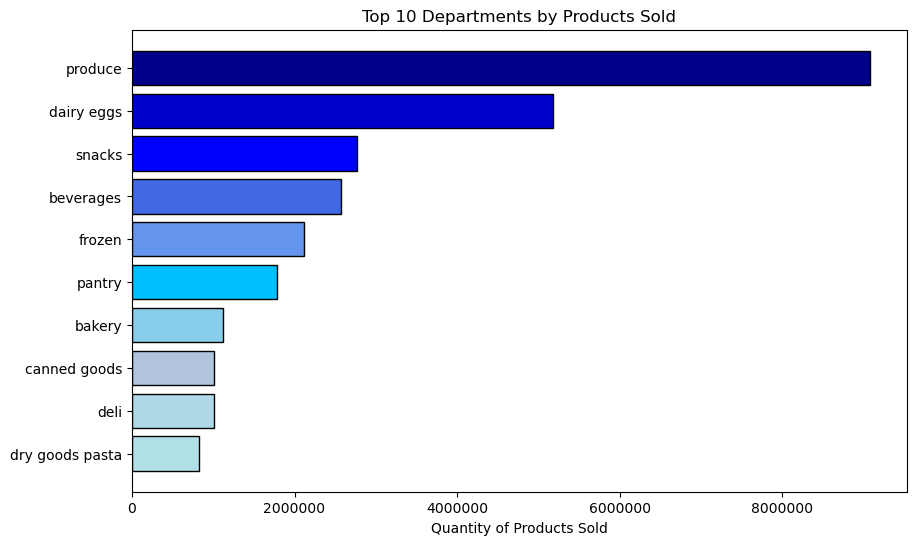

In [103]:
top_departments = department_comparison_subset['department'].value_counts().nlargest(10)

# Define different shades of blue for each bar
colors = ['darkblue', 'mediumblue', 'blue', 'royalblue', 'cornflowerblue',
         'deepskyblue', 'skyblue',  'lightsteelblue', 'lightblue', 'powderblue']

plt.figure(figsize=(10,6))  # Adjust the figure size as needed
bars = plt.barh(top_departments.index, top_departments.values, color=colors, edgecolor='black')

# Set the x-axis label and title
plt.xlabel('Quantity of Products Sold')
plt.title('Top 10 Departments by Products Sold')

# Invert y-axis to have the highest value at the top
plt.gca().invert_yaxis()

# Format y-axis to avoid scientific notation
plt.ticklabel_format(style='plain', axis='x')

plt.savefig(os.path.join(path, 'Analysis','Visualizations','top_10_departments_bar.png'))

plt.show()

# Top 5 Departments by Income Group

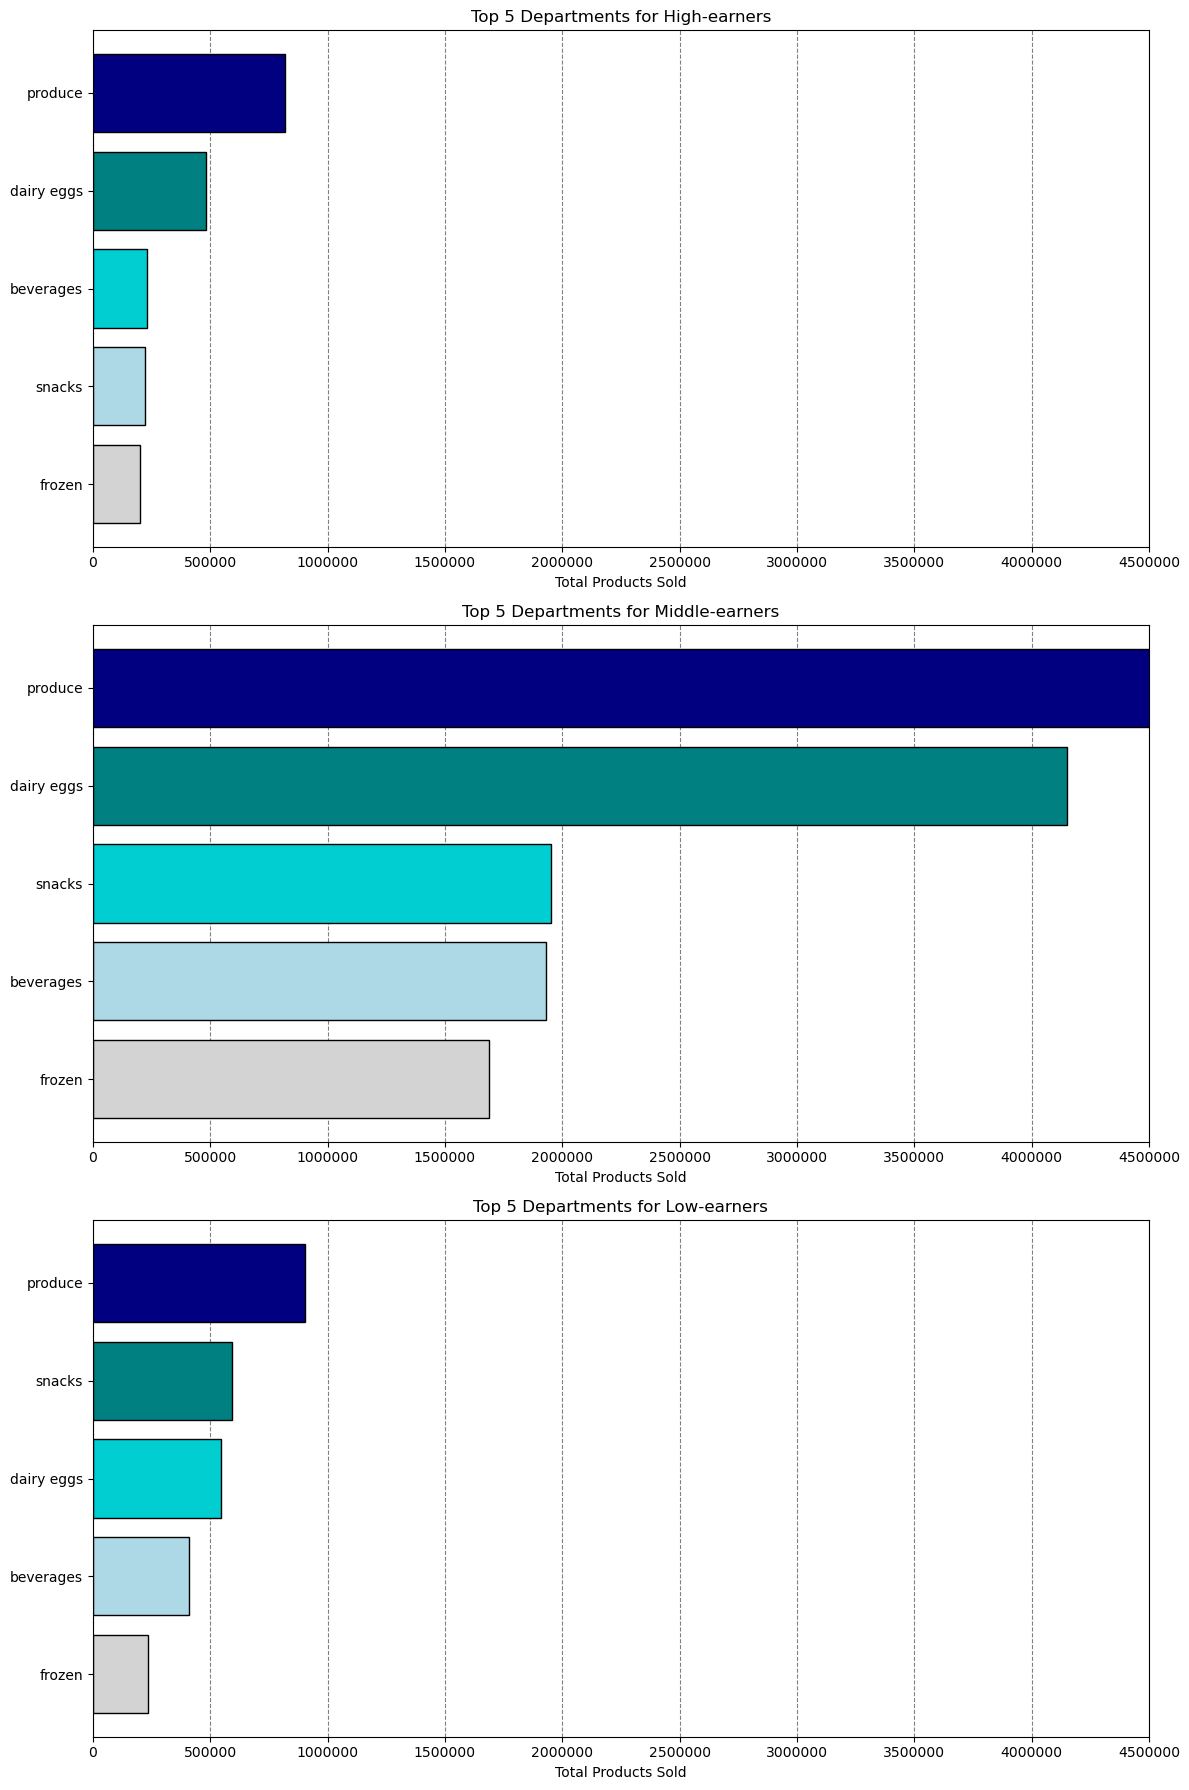

In [104]:
# Group by income_group and department, count occurrences, and sort
income_department_counts = department_comparison_subset.groupby(['income_group', 'department']).size().reset_index(name='counts')
income_department_counts.sort_values(by=['income_group', 'counts'], ascending=False, inplace=True)

# Create subplots and color scheme
fig, axs = plt.subplots(3, 1, figsize=(12, 18))
colors = ['navy', 'teal', 'darkturquoise', 'lightblue', 'lightgrey'] 

# Define the desired order of income groups
desired_order = ['High', 'Middle', 'Low']

# Iterate over each income group and create a horizontal bar chart
for i, income_group in enumerate(desired_order):
    income_data = income_department_counts[income_department_counts['income_group'] == income_group].head(5)
    ax = axs[i]
    ax.barh(income_data['department'], income_data['counts'], color=colors, edgecolor='black', zorder=2)
    ax.set_title(f'Top 5 Departments for {income_group}-earners')
    ax.set_xlabel('Total Products Sold')
    ax.set_xlim(0, 4500000)  # Keep x-axis range consistent for comparisons
    ax.ticklabel_format(style='plain', axis='x')
    ax.set_ylabel('')
    ax.invert_yaxis()  # Invert y-axis to have the highest count at the top
    ax.grid(axis='x', color='gray', linestyle='dashed')

plt.tight_layout()

plt.savefig(os.path.join(path, 'Analysis','Visualizations','income_departments_bar.png'))
            
plt.show()


- The top 5 departments are the same regardless of income bracket. This suggests relative consistency in terms of product popularity

# Top 5 Departments by Age Group

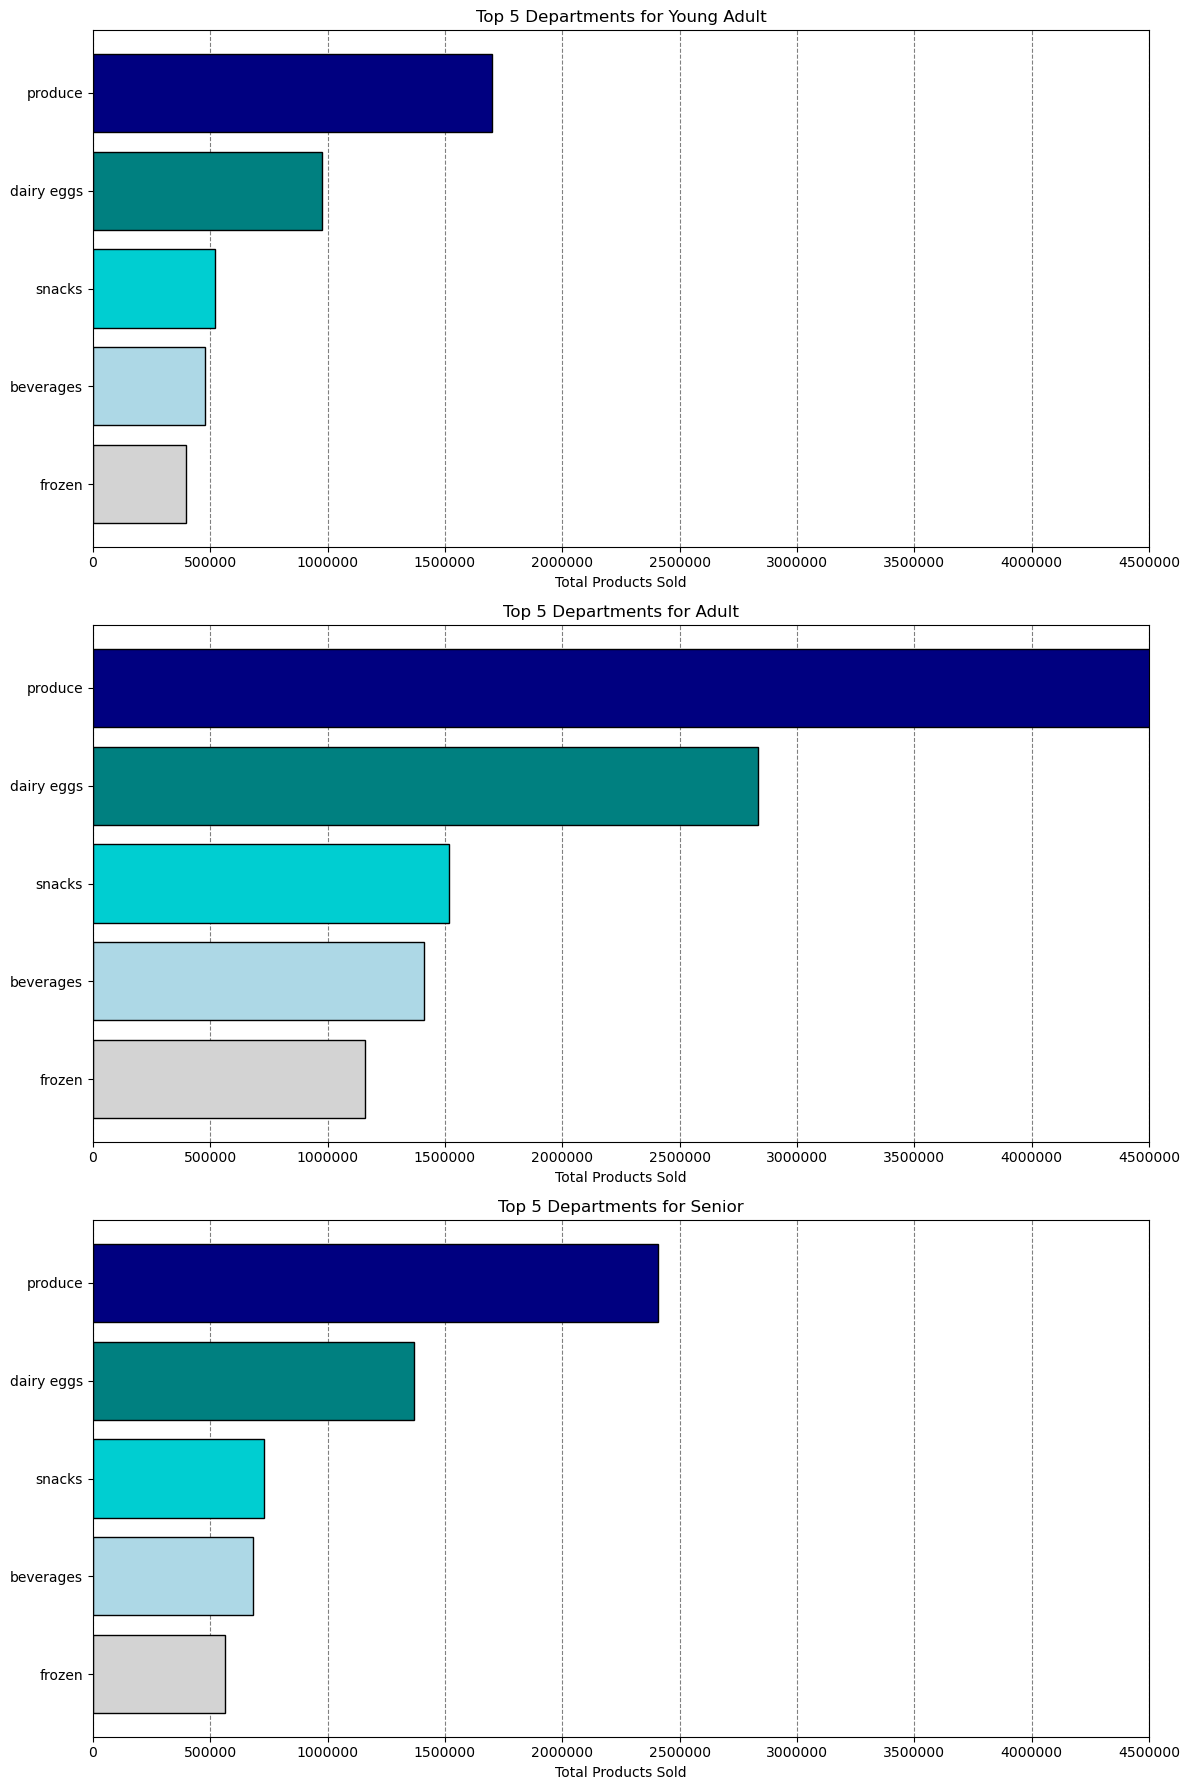

In [105]:
# Group by age_group and department, count occurrences, and sort
age_department_counts = department_comparison_subset.groupby(['age_group', 'department']).size().reset_index(name='counts')
age_department_counts.sort_values(by=['age_group', 'counts'], ascending=False, inplace=True)

# Create subplots and color scheme
fig, axs = plt.subplots(3, 1, figsize=(12, 18))
colors = ['navy', 'teal', 'darkturquoise', 'lightblue', 'lightgrey'] 

# Define the desired order of income groups
desired_order = ['Young Adult', 'Adult', 'Senior']

# Iterate over each income group and create a horizontal bar chart
for i, age_group in enumerate(desired_order):
    age_data = age_department_counts[age_department_counts['age_group'] == age_group].head(5)
    ax = axs[i]
    ax.barh(age_data['department'], age_data['counts'], color=colors, edgecolor='black', zorder=2)
    ax.set_title(f'Top 5 Departments for {age_group}')
    ax.set_xlabel('Total Products Sold')
    ax.set_xlim(0, 4500000)  # Keep x-axis range consistent for comparisons
    ax.ticklabel_format(style='plain', axis='x')
    ax.set_ylabel('')
    ax.invert_yaxis()  # Invert y-axis to have the highest count at the top
    ax.grid(axis='x', color='gray', linestyle='dashed')

plt.tight_layout()

plt.savefig(os.path.join(path, 'Analysis','Visualizations','age_departments_bar.png'))

plt.show()


- The top five departments are the same across age group, again suggesting consistency in ordering patterns

# Top 5 Departments by Dependant Status

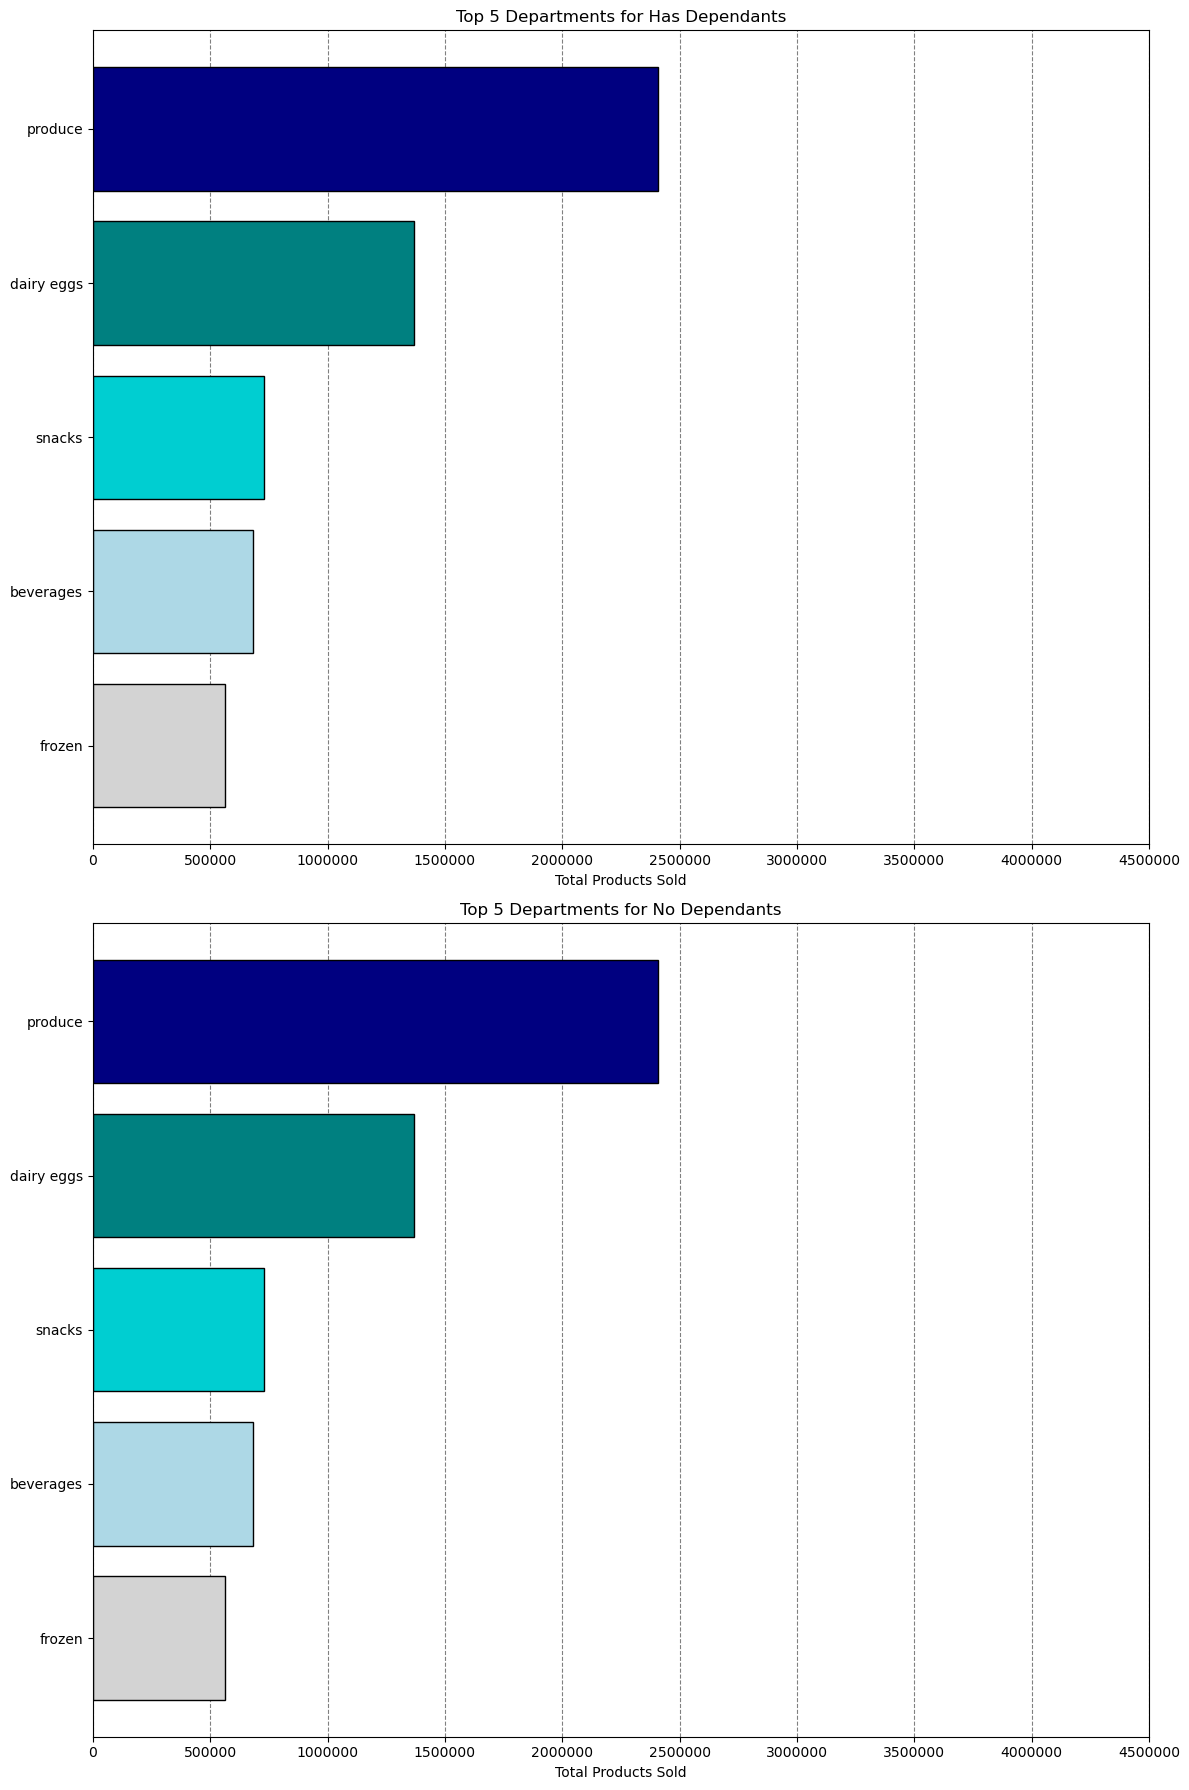

In [106]:
# Group by dependants_flag and department, count occurrences, and sort
dependants_department_counts = department_comparison_subset.groupby(['dependants_flag', 'department']).size().reset_index(name='counts')
dependants_department_counts.sort_values(by=['dependants_flag', 'counts'], ascending=False, inplace=True)

# Create subplots and color scheme
fig, axs = plt.subplots(2, 1, figsize=(12, 18))
colors = ['navy', 'teal', 'darkturquoise', 'lightblue', 'lightgrey'] 

# Define the desired order of income groups
desired_order = ['Has Dependants', 'No Dependants']

# Iterate over each income group and create a horizontal bar chart
for i, dependants_flag in enumerate(desired_order):
    dependants_data = dependants_department_counts[dependants_department_counts['dependants_flag'] == dependants_flag].head(5)
    ax = axs[i]
    ax.barh(age_data['department'], age_data['counts'], color=colors, edgecolor='black', zorder=2)
    ax.set_title(f'Top 5 Departments for {dependants_flag}')
    ax.set_xlabel('Total Products Sold')
    ax.set_xlim(0, 4500000)  # Keep x-axis range consistent for comparisons
    ax.ticklabel_format(style='plain', axis='x')
    ax.set_ylabel('')
    ax.invert_yaxis()  # Invert y-axis to have the highest count at the top
    ax.grid(axis='x', color='gray', linestyle='dashed')

plt.tight_layout()

plt.savefig(os.path.join(path, 'Analysis','Visualizations','dependants_departments_bar.png'))

plt.show()

 - The departments are again consistently the same here regardless of dependant status

# Additional Charts

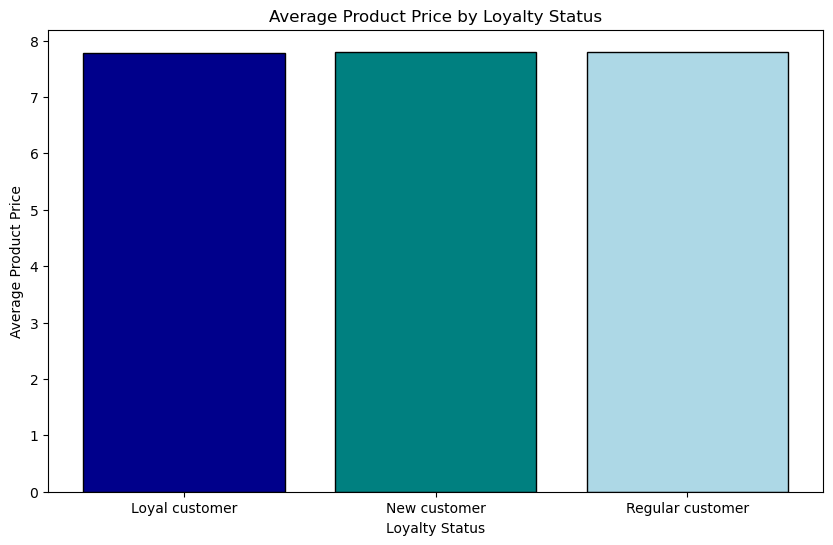

In [111]:
average_prices = department_comparison_subset.groupby('loyalty_flag')['prices'].mean().reset_index()

# Define the colors
colors = ['darkblue', 'teal', 'lightblue']

# Create the bar graph
plt.figure(figsize=(10, 6))
bars = plt.bar(average_prices['loyalty_flag'], average_prices['prices'], color=colors, edgecolor='black')

# Title and labels
plt.title('Average Product Price by Loyalty Status')
plt.xlabel('Loyalty Status')
plt.ylabel('Average Product Price')

plt.savefig(os.path.join(path, 'Analysis','Visualizations','loyalty_prices_bar.png'))

# Show the plot
plt.show()

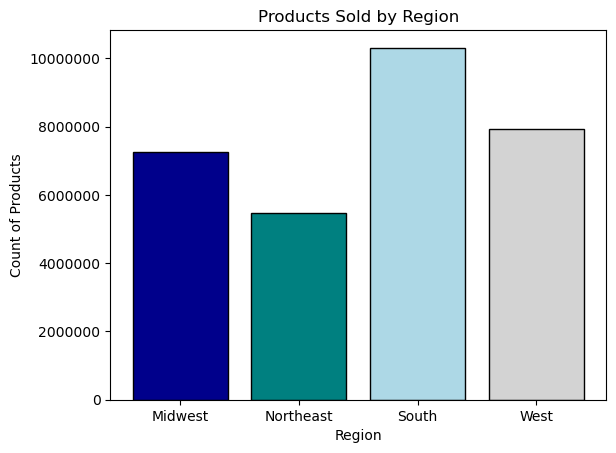

In [121]:
# Grouping by 'region' and counting 'product_name'
grouped_data = department_comparison_subset.groupby('Region')['product_name'].count()

# Plotting
colors = ['darkblue', 'teal', 'lightblue', 'lightgrey']

fig, ax = plt.subplots()
bars = ax.bar(grouped_data.index, grouped_data.values, color=colors, edgecolor='black')

# Disable scientific notation
ax.ticklabel_format(style='plain', axis='y')

# Adding title and labels
ax.set_title('Products Sold by Region')
ax.set_xlabel('Region')
ax.set_ylabel('Count of Products')

plt.savefig(os.path.join(path, 'Analysis','Visualizations','region_product_bar.png'))

# Display the plot
plt.show()

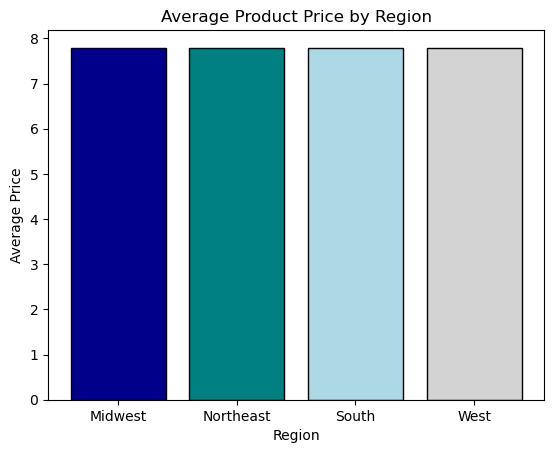

In [127]:
# Group by 'region' and calculate the mean of 'prices'
avg_prices = department_comparison_subset.groupby('Region')['prices'].mean()

# Define colors
colors2 = ['darkblue', 'teal', 'lightblue', 'lightgrey']

# Create the bar plot
fig, ax = plt.subplots()

# Ensure the number of colors matches the number of bars
bars = ax.bar(avg_prices.index, avg_prices, color=colors2[:len(avg_prices)], edgecolor='black')

# Title and labels
ax.set_title('Average Product Price by Region')
ax.set_xlabel('Region')
ax.set_ylabel('Average Price')

# Remove scientific notation on the Y axis
ax.get_yaxis().get_major_formatter().set_scientific(False)

plt.savefig(os.path.join(path, 'Analysis','Visualizations','region_product_price_bar.png'))

# Display the plot
plt.show()

# Export Data Sets

In [108]:
instacart_kept.to_pickle(os.path.join(path, 'Data','Prepared Data', 'instacart_kept.pkl'))

KeyboardInterrupt: 

In [ ]:
instacart_sample.to_pickle(os.path.join(path, 'Data','Prepared Data', 'instacart_sample_task_10.pkl'))

In [ ]:
department_comparison_subset.to_pickle(os.path.join(path, 'Data','Prepared Data', 'department_comparison_subset.pkl'))